<a href="https://colab.research.google.com/github/donghuna/AI_Expert_Lecture_Files/blob/main/Lab1_1_2_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy
* 다차원 Array와 관련된 연산을 편리하게 하기 위한 라이브러리이다.
* numpy 모듈 설치 후 import numpy (as np)로 import하여 사용하면 된다.
 * colab에는 기본적으로 설치되어있다.

In [1]:
import numpy as np

# np.array
* python array와 같은 element를 가지는 numpy ndarray를 만드는 함수
* `np.array(object, dtype=None)`
  * `object` : 값을 가져올 python array
  * `dtype` : 각 component가 가질 data type. int, float, bool 등이 있으며, 입력하지 않을 시 object에 맞춰서 자동으로 결정된다.
  

In [2]:
a = np.array([1, 2, 3, 4, 5])
print(a) # a: 정수, 1차원 배열

b = np.array([[1, 2], [3, 4]], dtype=float)
print(b) # b: 실수, 2차원 배열

c = np.array([1, 0, 0, 1], dtype=bool)
print(c) # c: Boolean(2진수), 1차원 배열

[1 2 3 4 5]
[[1. 2.]
 [3. 4.]]
[ True False False  True]


# shape
* numpy array는 *모양(shape)*와 **데이터 타입(dtype)**을 가진다.
* 3차원 벡터는 shape가 (3), 5x3 행렬은 (5, 3), 4x3x2 "텐서"는 shape가 (4, 3, 2)...와 같은 식

In [3]:
print(a.shape, a.dtype)
print(b.shape, b.dtype)
print(c.shape, c.dtype)

(5,) int64
(2, 2) float64
(4,) bool


# Array 생성 (np.zeros, np.ones, np.full)
* 미리 정의된 다양한 초기값의 numpy array들을 만드는 함수
  * `np.zeros(shape)`
  * `np.ones(shape)`
  * `np.full(shape, fill_value)`
    * `shape` : 해당 numpy array가 가질 shape
    * `fill_value` : 해당 numpy array에 채울 상수
    * `dtype` : 해당 numpy array의 각 component가 가질 data type

In [4]:
arr = np.array([1,2,3]) # [1,2,3]으로 초기화된 numpy 3차원 벡터
zeros = np.zeros((3, 3)) # 0으로 초기화된 3x3 행렬
ones = np.ones((3, 3)) # 1로 초기화된 3x3 행렬
twos = np.full([3, 3], 2) # fill_value=2로 초기화된 3x3 행렬

print(arr, arr.shape)
print(zeros, zeros.shape)
print(ones, ones.shape)
print(twos, twos.shape)

[1 2 3] (3,)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] (3, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3)
[[2 2 2]
 [2 2 2]
 [2 2 2]] (3, 3)


# Array 연산
* 기본적으로 같은 크기의 array끼리 사칙연산이 가능하다.
* 이 경우, 같은 위치의 component들끼리 연산된다.

In [5]:
print(zeros + ones)
print(ones / twos)
print(zeros + ones * twos)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


* ==, <, > 등의 등호/부등호 연산자도 사용가능하며, 이 경우 결과값은 boolean array가 된다.

In [6]:
print(zeros == [[0, 0, 0], [0, 0, 0], [0, 0, 0]])
print(zeros > ones)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[False False False]
 [False False False]
 [False False False]]


# Brodacasting
* Numpy에서는 서로 다른 shape를 가진 array끼리도, 각 차원의 비교를 통해 특정한 조건이 성립하면 이항 연산이 가능하다.
* 예컨대 a가 n차원이고 b가 1차원이라면 b의 값들을 n차원으로 "복제"하여 계산해준다.
* 차원 비교 법칙: 차원의 비교는 뒤쪽(하위차원)에서부터 한다.
* 정확한 룰은 다음과 같다 :
  * a의 shape가 [n1, n2, ...nk] 이고, b의 shape가 [m1, m2, ..., ml] 이라 하자.
  * (i, j) = (k, l)부터 시작하여 i와 j를 1씩 낮춰가며 ni와 mj를 비교한다.(i나 j가 0이 될 때까지)
  * ni = mj 이라면 차원을 그대로 놔둔다.
  * ni = 1 이라면, a의 i번째 차원(1차원)을 복제하여 mj차원으로 확장한다.
  * mj = 1 이라면, b의 j번째 차원(1차원)을 복제하여 ni차원으로 확장한다.
  * 세 경우 다 아니라면, Broadcasting이 안되는 것이므로 ValueError가 발생한다.
  * i나 j가 0이 되었다면, shape의 길이가 더 작은 쪽(i나 j가 먼저 0이 된 쪽)의 나머지 차원이 모두 1이라고 간주하고 복제하여 더 큰 쪽의 차원에 맞춘다.

<img src="https://s3.amazonaws.com/cloudxlab/static/images/course/numpy_pandas_for_ml/Broacasting_2_rule.png" alt="Alt text" title="Optional title">


* 출처: https://s3.amazonaws.com/cloudxlab/static/images/course/numpy_pandas_for_ml/Broacasting_2_rule.png

In [7]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(f'a:\n{a},\na.shape: {a.shape}\n')
b = np.array([-1, 0, 1])
print(f'b:\n{b},\nb.shape: {b.shape}\n')
c = a + b # b is broadcasted into shape (2, 3), which is [[-1, 0, 1], [-1, 0, 1]]
print(f'a + b:\n{c},\n(a + b).shape: {c.shape}')

a:
[[1 2 3]
 [4 5 6]],
a.shape: (2, 3)

b:
[-1  0  1],
b.shape: (3,)

a + b:
[[0 2 4]
 [3 5 7]],
(a + b).shape: (2, 3)


# Broadcasting : example
* 예컨대 64x64 크기의 RGB 이미지 a의 모든 픽셀에 일정한 RGB값 b를 더해주고 싶다고 하자.
* 이 때는 그냥 a + b를 해주면 된다.
* a의 shape가 [64, 64, 3]이고 b의 shape가 [3]인 경우이므로, 뒤쪽 차원인 3이 같다. 이 경우 b쪽의 shape의 길이가 더 작으므로 b는 [1, 1, 3]의 shape를 가지고 있다고 간주하고, b를 복제하여 [64, 64, 3]의 shape를 갖게 만든다.

img_numpy.shape: (300, 200, 3), img_numpy.dtype: uint8


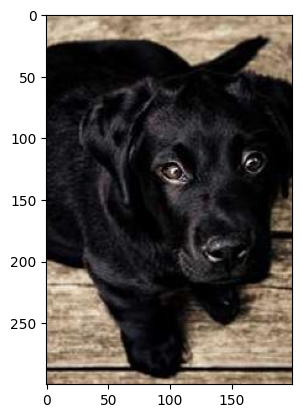

In [8]:
import requests
import numpy as np
from PIL import Image
from io import BytesIO
from matplotlib.pyplot import imshow

response = requests.get('https://picsum.photos/id/237/200/300')
img = Image.open(BytesIO(response.content))
img_numpy = np.asarray(img)
print(f'img_numpy.shape: {img_numpy.shape}, img_numpy.dtype: {img_numpy.dtype}')

imshow(img_numpy)

(img_numpy + np.array([64, 64, 64])).shape :  (2, 3)


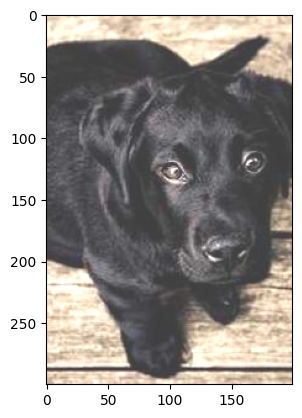

In [9]:
print('(img_numpy + np.array([64, 64, 64])).shape : ', (a+b).shape)
imshow(img_numpy + np.array([64, 64, 64]))                            # a의 각 픽셀에 [64, 64, 64]를 더한다.

# Array Indexing
* 기본적으로 python의 indexing과 동일하다, [-N, N)의 음수를 포함한 indexing허용.
* -1   &nbsp;&nbsp;&nbsp;&nbsp;&mdash; 맨 끝 원소
* n:m  &nbsp;&mdash; n번째 원소부터 m-1번째 원소까지
* :    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&mdash; 해당 차원에 있는 원소 전부

In [10]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(f'(a) {a[0]}')           # a의 0번째 행
print(f'(b) {a[1][-1]}')       # a의 1번째 행의 마지막 원소
print(f'(c)\n{a[0:2]}')         # a의 0번째 행~1번째 행
print(f'(d) {a[:, 1]}')        # a의 1번째 열 전체
print(f'(e) {a[1:-1, :]}')     # a의 1번째 행 ~ 마지막에서 2번째 행 전체

(a) [1 2 3]
(b) 6
(c)
[[1 2 3]
 [4 5 6]]
(d) [2 5 8]
(e) [[4 5 6]]


#np.sum
* 해당 array/tensor의 특정 축을 따라 모든 원소를 더한다. 축이 명시되지 않았다면, 모든 원소를 더한다.
* np.sum(a, axis=None, keepdims=False)
 * a : 해당 array
 * axis : element를 따라 더할 축의 index
 * keepdims : True일 경우 해당 축에 1차원 벡터로 남고, False일 경우 해당 축에 (0차원) element로 남는다.

In [11]:
a = np.array([[1, 2, 3], [3, 5, 7]])
print(np.sum(a))

# a의 shape가 (2, 3)이므로, axis=0으로 np.sum을 부르면 첫 번째 축(axis)을 따라 더하므로 결과 array의 shape (1, 3)이 된다.
# axis=1로 하면 두 번째 축을 따라 더하므로 결과 array의 shape가 (2, 1)이 된다.
# Q) keepdims=False일경우?


print(np.sum(a, axis=0, keepdims=True))    #   1    2     3
                                           #   |    |     |
                                           #   |    |     |
                                           #   3    5     7
                                           #   |    |     |
                                           #   V    V     V
                                           #   4    7     10

print(np.sum(a, axis=1, keepdims=True))    #   -- 1 -- 2 -- 3 --> 6
                                           #   -- 3 -- 5 -- 7 --> 15

# keepdims=False로 하면 결과 array의 shape가 [2]가 된다.
print(np.sum(a, axis=1, keepdims=False))

21
[[ 4  7 10]]
[[ 6]
 [15]]
[ 6 15]


#np.mean, np.std, np.var
* 해당 array/tensor의 특정 축을 따라 평균/표준편차/분산을 구한다. 축이 명시되지 않았다면, 모든 원소의 평균/표준편차/분산을 구한다.
* `np.mean(a, axis=None, keepdims=False)`
* `np.std(a, axis=None, keepdims=False)`
* `np.var(a, axis=None, keepdims=False)`

In [12]:
print(np.mean(a))
print(np.std(a, axis=0))
print(np.var(a, axis=1))

3.5
[1.  1.5 2. ]
[0.66666667 2.66666667]


#np.reshape
* 해당 numpy array를 주어진 shape로 바꾼다. 이 때, 원래 array의 shape와 바꿀 shape의 총 크기는 같아야 한다.
* `np.reshape(arr, newshape)`
  * `arr` : reshape시킬 array
  * `newshape` : 바꿀 shape
* 최대 하나의 dimension의 크기를 -1로 입력할 수 있으며, 이 때 해당 dimension의 크기는 나머지 dimension들의 크기에 따라 자동으로 결정된다.

In [13]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print('a')
print(a, a.shape)

print('\nb')
b = np.reshape(a, [6, 1])
print(b, b.shape)

print('\nc')
c = np.reshape(a, [3, -1])    #[3, 2]로 자동으로 변환된다.
print(c, c.shape)

a
[[1 2 3]
 [4 5 6]] (2, 3)

b
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]] (6, 1)

c
[[1 2]
 [3 4]
 [5 6]] (3, 2)


# np.stack
* **새로운 축을 만든 뒤** 해당 array들을 해당 축 방향으로 쌓아서 새로운 array를 만든다. 이 때 쌓을 array들의 shape는 완전히 같아야 한다.
* `np.stack(arrays, axis=0)`
  * `arrays` : 쌓을 array들의 collection (list/tuple/vector)
  * `axis` : 쌓을 축의 index. axis=-1로 할 시 마지막 축을 따라 쌓는다.

In [14]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([4, 5, 6, 7])

# shape[3]과 shape[3]을 0번 축을 따라 쌓으므로 결과 array의 shape는 [2, 3]이 된다.
print(np.stack((a, b)))

# shape[3]과 shape[3]을 1번 축을 따라 쌓으므로 결과 array의 shape는 [3, 2]가 된다.
print(np.stack((a, b), axis=1))


#print(np.stack((a, c)))  #->  ValueError! 크기가 안 맞으므로 쌓을 수 없다.


a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[7, 8, 9], [10, 11, 12], [13, 14, 15]])

# shape[3, 3]과 shape[3, 3]을 1번 축을 따라 쌓으므로 결과 array의 shape는 [3, 2, 3]이 된다.
print()
print(np.stack((a, b), axis=1))

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]

[[[ 1  2  3]
  [ 7  8  9]]

 [[ 4  5  6]
  [10 11 12]]

 [[ 7  8  9]
  [13 14 15]]]


#np.concatenate
* 해당 array들을 **기존의 주어진 축 방향으로** 연결한다. 이 때 array들의 shape는 연결할 축을 제외하고 shape가 완전히 같아야 한다.
* `np.concatenate(arrays, axis=0)`
  * `arrays` : 연결할 array들
  * `axis` : 연결할 축의 index. axis=-1로 할 시 마지막 축을 따라 연결한다.

In [15]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])


# shape[2, 2]와 shape[1, 2]를 0번 축 방향으로 연결하므로 결과 array의 shape는 [3, 2]가 된다.
print(np.concatenate((a,b), axis=0))

c = np.array([[7, 8, 9], [10, 11, 12]])

# shape[2, 2]와 shape[2, 3]을 1번 축 방향으로 연결하므로 결과 array의 shape는 [2, 5]가 된다.
print(np.concatenate((a, c), axis=1))

[[1 2]
 [3 4]
 [5 6]]
[[ 1  2  7  8  9]
 [ 3  4 10 11 12]]


* `np.random.random(size)`
  * 각 element가 0에서 1사이의 랜덤한 값들을 가지는 size 크기의 array를 만든다.
  * 각 element는 서로 독립이며, 모두 uniform random distribution을 따른다.
* `np.random.randint(low, high=None, size=None)`
  * high가 None일 때 : 각 element가 0 이상 low 이하의 랜덤한 정수인, size 크기의 array를 만든다.
  * high가 주어졌을 때 : 각 element가 low 이상 high 이하의 랜덤한 정수인, size 크기의 array를 만든다.
  * 각 element는 서로 독립이며, 범위 내의 각 정수가 나올 확률은 모두 같다.
* `np.random.normal(loc=0.0, scale=1.0, size=None)`
  * 각 element가 평균이 loc이고 표준편차가 scale인 정규분포에서 추출된, size 크기의 array를 만든다.
  * 각 element는 서로 독립이며, N(loc, scale^2)의 분포를 가진다.

In [16]:
print('np.random.random((2, 3)):')
print(np.random.random(size=(2, 3)))
print('\nnp.random.randint(3, size=(2, 3)):')
print(np.random.randint(3, size=(2, 3)))
print('\nnp.random.randint(3, 8, size=(2, 3)):')
print(np.random.randint(3, 8, size=(2, 3)))
print('\nnp.random.normal(2, 1, size=(2, 3)):')
print(np.random.normal(2, 1, size=(2, 3)))

np.random.random((2, 3)):
[[0.72759265 0.41058508 0.48692119]
 [0.61399037 0.93032229 0.68316532]]

np.random.randint(3, size=(2, 3)):
[[0 2 1]
 [0 2 1]]

np.random.randint(3, 8, size=(2, 3)):
[[3 5 6]
 [5 4 4]]

np.random.normal(2, 1, size=(2, 3)):
[[2.88542918 1.60753061 3.08115245]
 [3.30560933 1.5298662  0.68212571]]


# NumPy array를 파일에 저장하고 불러오기
* (권장) built-in save/load 사용
  * `np.save(file, array)`
  * `np.load(file)`
* Python 객체 직렬화 라이브러리 pickle 사용
  * `pickle.dump(array, file)` : 해당 array를 file에 저장한다.
  * `pickle.load(f)` : 해당 file에서 array를 로드하여 리턴한다.

In [17]:
a = np.array([[1, 2, 3], [4, 5, 6]])
with open('./a.npy', 'wb') as f:
  np.save(f, a)

with open('./a.npy', 'rb') as f:
  b = np.load(f)
print(b)
import pickle

a = np.array([[1, 2, 3], [4, 5, 6]])
with open('./a.pkl', 'wb') as f:
  pickle.dump(a, f)

with open('./a.pkl', 'rb') as f:
  b = pickle.load(f)

print(b)

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


# 그 외에 유용한 함수들
* 각자 실행 및 검색을 통해 정확한 용법을 확인해보시길 바랍니다.ㄴ numpy를 사용하면서 한번쯤은 꼭 사용하게 될 편리한 함수들입니다.
* np.max, np.min : 최대, 최소값을 리턴
* np.argmax, np.argmin : 최대, 최소로 만드는 index(들)을 리턴
* np.where : 특정 조건을 만족하는 곳에서 x의 값을, 아닌 곳에서 y의 값을 가지는 array를 리턴
* np.argwhere : 특정 조건을 만족하는 index(들)을 리턴
* np.take : 해당 array에서 해당 index들을 뽑아 만든 array를 리턴
* np.sort : 해당 array를 주어진 기준에 대하여 정렬
* np.transpose (또는 np.ndarray.T) : 해당 array를 transpose
* np.expand_dims : 해당 array에 축을 추가
* np.squeeze : 차원 크기가 1인 축을 제거

* np.exp, np.log, np.sqrt, np.sin, np.cos, np.tan, ... : element-wise 함수들
* np.matmul : 행렬 곱
* 등등등... 필요한 게 있을 때는 구글링을 하거나 https://docs.scipy.org/doc/numpy/reference/index.html 를 참조


# PyTorch 라이브러리에서의 NumPy
* numpy는 ml라이브러리의 기초로써, numpy에 있는 대부분의 함수들과 같은 역할을 pytorch 함수가 존재한다.
* numpy의 함수들은 numpy array를 리턴하지만, pytorch의 함수들은 pytorch Tensor들을 리턴한다는 점이 다르다.
* np.array -> torch.Tensor
* np.sum -> torch.sum
* np.reshape -> torch.view
* 등등등... 역할은 거의 같으니 필요한 게 있다면 documentation https://pytorch.org/docs/stable/torch.html 를 참조

In [18]:
import torch
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
a.view([3, 2])

tensor([[1, 2],
        [3, 4],
        [5, 6]])